In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter
from scipy.stats import pearsonr
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_LA = pd.read_csv(r"F:\wenqu\DOE_Arctic_project\spectral\combine_LA.csv")
df_SLA = pd.read_csv(r"F:\wenqu\DOE_Arctic_project\spectral\combine_SLA.csv")
df_LDMC = pd.read_csv(r"F:\wenqu\DOE_Arctic_project\spectral\combine_LDMC.csv")

In [3]:
df_LDMC

,Unnamed: 0,vol_moisture,weighted_sla,weighted_la,weighted_LDMC,b1_mean,b2_mean,b3_mean,b4_mean,b5_mean,...,b113_std,b114_std,b115_std,b116_std,b117_std,b118_std,b119_std,b120_std,b121_std,b122_std
0,site2a_qu_10,11.500000,103.274730,7.685520,0.431687,0.025130,0.021349,0.017708,0.013147,0.011564,...,0.066307,0.060369,0.056838,0.062961,0.058079,0.053972,0.054655,0.053167,0.059931,0.066890
1,site2a_qu_11,55.700000,80.669833,1.895693,0.533587,0.037116,0.028136,0.027556,0.022787,0.022009,...,0.147961,0.148489,0.137109,0.141940,0.147016,0.137352,0.143938,0.143416,0.132508,0.157942
2,site2a_qu_12,13.166667,102.828431,1.776364,0.756281,0.009131,0.014486,0.009359,0.010267,0.008580,...,0.080970,0.077439,0.082271,0.070964,0.074677,0.075373,0.075561,0.075743,0.077886,0.089153
3,site2a_qu_13,50.900000,82.917004,1.410099,0.497387,0.013592,0.017636,0.015679,0.011988,0.009930,...,0.048441,0.044967,0.039642,0.039218,0.035964,0.038140,0.039319,0.033442,0.040686,0.052364
4,site2a_qu_15,30.533333,89.337309,29.536792,0.586036,0.035638,0.038242,0.027876,0.025192,0.022157,...,0.056092,0.049808,0.044308,0.047534,0.047925,0.044334,0.046059,0.046897,0.043516,0.050899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,site6_q_2,25.066667,97.318287,18.487914,0.380857,0.001883,0.004552,0.005339,0.009010,0.011587,...,0.040810,0.036970,0.024927,0.026767,0.024191,0.051995,0.027982,0.026825,0.031034,0.045559
57,site6_q_3,55.933333,93.647522,7.037150,0.372395,0.002346,0.003304,0.004541,0.007759,0.009294,...,0.039503,0.033722,0.023706,0.025587,0.030969,0.028866,0.022222,0.018224,0.027983,0.041257
58,site6_q_6,63.300000,97.080215,11.953308,0.460407,0.000474,0.003555,0.005241,0.007608,0.008677,...,0.028041,0.027656,0.021054,0.019241,0.022796,0.018238,0.017797,0.021156,0.021885,0.032827
59,site6_q_8,56.433333,83.864292,6.134349,1.607404,0.002891,0.003770,0.005975,0.007441,0.008586,...,0.029016,0.025141,0.021974,0.022875,0.023644,0.026692,0.022467,0.021704,0.025153,0.046095


In [4]:
b_name_mean = []
b_name_std = []
for i in range(1, 123):
    b_mean = 'b' + str(i) + '_mean'
    b_name_mean.append(b_mean)
    b_std = 'b' + str(i) + '_std'
    b_name_std.append(b_std)
band_name = b_name_mean + b_name_std
# band_name

In [5]:
y_weighted_sla = df_SLA['weighted_sla']
y_weighted_la = df_LA['weighted_la']
y_weighted_LDMC = df_LDMC['weighted_LDMC']

vol_mois_sla = df_SLA['vol_moisture']
vol_mois_la = df_LA['vol_moisture']
vol_mois_LDMC = df_LDMC['vol_moisture']


x_sla = df_SLA[band_name]
x_la = df_LA[band_name]
x_ldmc = df_LDMC[band_name]


LA_n_2a = 28
LA_n_1b = 52
LA_n_2c = 57
LA_n_6 = 65


SLA_n_2a = 26
SLA_n_1b = 51
SLA_n_2c = 56
SLA_n_6 = 64


LDMC_n_2a = 24
LDMC_n_1b = 49
LDMC_n_2c = 54
LDMC_n_6 = 62

In [6]:
type(y_weighted_la)

pandas.core.series.Series

In [7]:
def optimise_pls_cv(X, y, n_comp, vol_mois, n_2a, n_1b, n_2c,n_6, plot_components=True):
 
    '''Run PLS including a variable number of components, up to n_comp,
       and calculate MSE '''
 
    mse = []
    component = np.arange(1, n_comp)
 
    for i in component:
        pls = PLSRegression(n_components=i)
 
        # Cross-validation
        y_cv = cross_val_predict(pls, X, y, cv=10)
 
        mse.append(mean_squared_error(y, y_cv))
 
        comp = 100*(i+1)/40
        # Trick to update status on the same line
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
 
    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")
 
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(left=-1)
 
        plt.show()
 
    # Define PLS object with optimal number of components
    pls_opt = PLSRegression(n_components=msemin+1)
 
    # Fir to the entire dataset
    pls_opt.fit(X, y)
    y_c = pls_opt.predict(X)
    
    print(y_c.shape, type(y_c), y_c[0:27, ])   
    
#     break
 
    # Cross-validation
    y_cv = cross_val_predict(pls_opt, X, y, cv=10)[:, 0]
    print(y.mean(), y.min(), y.max(), y.shape)
    print(y_cv.mean(), y_cv.min(), y_cv.max(), y_cv.shape)
    
 
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
 
    # Calculate mean squared error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
    
    p_corr, p_value = pearsonr(y, y_cv)
    print(p_corr, p_value)
 
    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)
 
    # Plot regression and figures of merit
    rangey = max(y) - min(y)
    rangex = max(y_c) - min(y_c)
    
    


 
    # Fit a line to the CV vs response

    z = np.polyfit(y, y_c, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
       
        ax.scatter(y_c[0:n_2a, ], y[0:n_2a, ], c=vol_mois[0:n_2a, ],  cmap='Spectral', marker= '*',edgecolors='k')
        ax.scatter(y_c[n_2a:n_1b, ], y[n_2a:n_1b, ], c=vol_mois[n_2a:n_1b, ],  cmap='Spectral', marker= 'v',edgecolors='k')
        ax.scatter(y_c[n_1b:n_2c, ], y[n_1b:n_2c, ], c=vol_mois[n_1b:n_2c, ],  cmap='Spectral', marker= '.',edgecolors='k')
        ax.scatter(y_c[n_2c:n_6, ], y[n_2c:n_6, ], c=vol_mois[n_2c:n_6, ],  cmap='Spectral', marker= 'P',edgecolors='k')
#         plt.colorbar()
        #Plot the best fit line
        ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
        #Plot the ideal 1:1 line
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
 
        plt.show()
 
    return

100% completed
Suggested number of components:  4



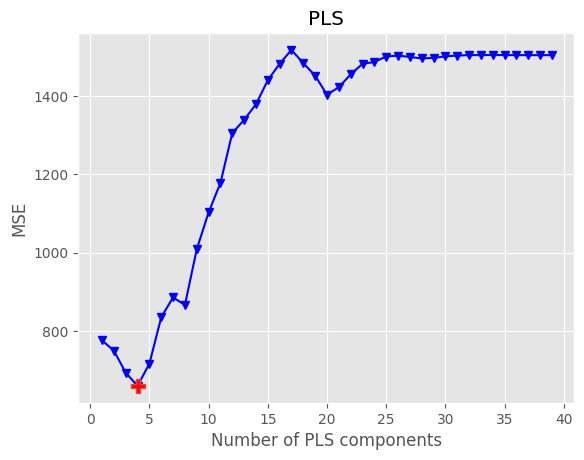

(63, 1) <class 'numpy.ndarray'> [[ 81.89716476]
 [ 79.70622867]
 [101.90501942]
 [ 90.1093972 ]
 [ 70.66476852]
 [ 65.67828846]
 [ 88.72153093]
 [ 96.18770133]
 [ 74.22085539]
 [ 80.7430057 ]
 [100.68205632]
 [ 68.27881469]
 [ 72.42059198]
 [ 62.74465847]
 [ 82.69072454]
 [ 75.28887258]
 [ 94.25561904]
 [ 53.81304718]
 [ 97.95526877]
 [ 84.63214113]
 [ 93.80846499]
 [ 78.91826822]
 [ 76.44607901]
 [ 80.7646495 ]
 [ 79.08843732]
 [107.51372254]
 [113.97408892]]
95.70437927507936 30.65948379 149.3431359 (63,)
95.33378252648403 48.48430991665705 133.5360292772791 (63,)
0.4484130040480019 0.00022811681895476278
R2 calib: 0.393
R2 CV: 0.152
MSE calib: 471.855
MSE CV: 659.358


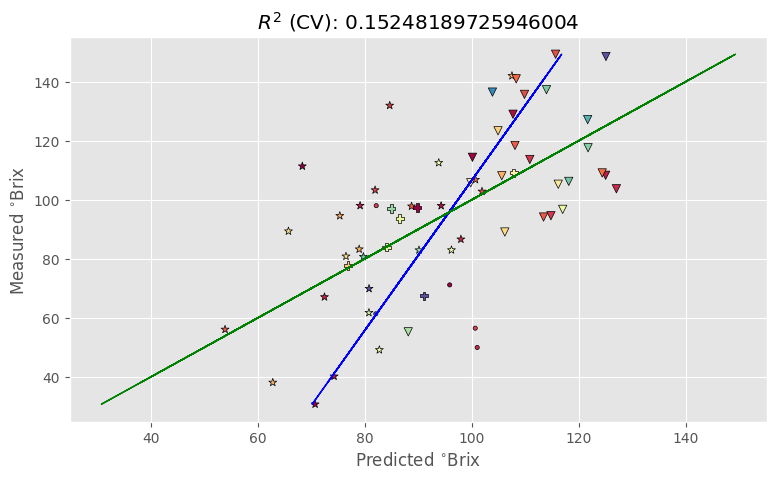

In [8]:
optimise_pls_cv(x_sla,y_weighted_sla, 40, vol_mois_sla,SLA_n_2a, SLA_n_1b,  SLA_n_2c, SLA_n_6, plot_components=True)

100% completed
Suggested number of components:  4



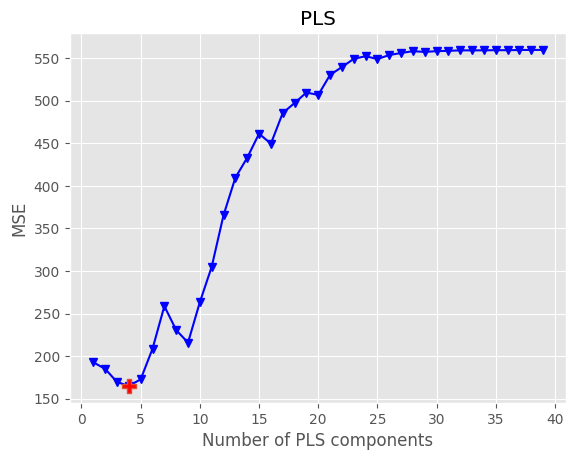

(64, 1) <class 'numpy.ndarray'> [[ 8.85358144]
 [-1.03548853]
 [13.85573197]
 [ 9.69743511]
 [ 1.73967067]
 [ 7.05744355]
 [12.09331071]
 [14.4600922 ]
 [ 1.71329735]
 [ 4.8689573 ]
 [22.53178011]
 [14.24752578]
 [-5.23043989]
 [ 2.22965299]
 [ 1.6436554 ]
 [17.8958218 ]
 [ 5.10909467]
 [ 2.52025301]
 [-9.16484624]
 [13.49835384]
 [ 7.01926544]
 [ 7.29501731]
 [ 1.09854456]
 [ 4.12213775]
 [ 6.95353939]
 [10.50684902]
 [16.73303024]]
12.8092995580625 0.382217195 64.9665 (64,)
12.779278411468464 -10.494349953920528 36.17195798846554 (64,)
0.43461278521513075 0.0003326019009244319
R2 calib: 0.371
R2 CV: 0.136
MSE calib: 120.180
MSE CV: 164.946


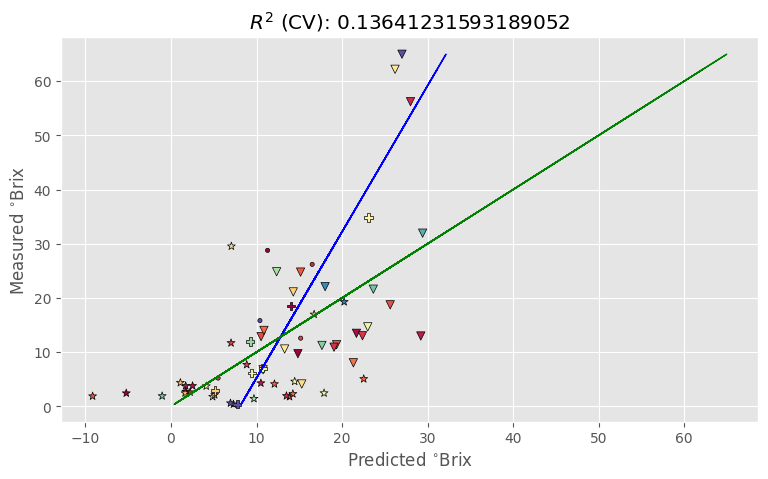

In [9]:
# optimise_pls_cv(x_la,y_weighted_la, 40, plot_components=True)
optimise_pls_cv(x_la,y_weighted_la, 40, vol_mois_la,LA_n_2a, LA_n_1b,  LA_n_2c, LA_n_6, plot_components=True)

100% completed
Suggested number of components:  4



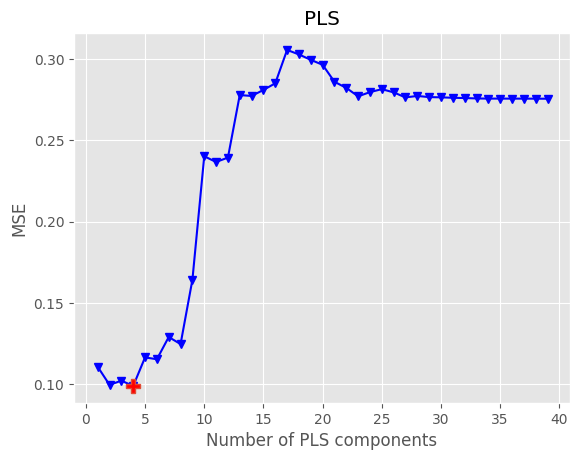

(61, 1) <class 'numpy.ndarray'> [[0.73406361]
 [0.69987841]
 [0.62211983]
 [0.70066974]
 [0.89598167]
 [0.67634829]
 [0.64836582]
 [0.64369355]
 [0.44649599]
 [0.91638929]
 [0.90402573]
 [1.00605791]
 [0.75852184]
 [0.74148535]
 [0.4485304 ]
 [1.08437655]
 [0.64812387]
 [0.6885764 ]
 [0.6003066 ]
 [0.89473144]
 [0.80575074]
 [0.76266105]
 [0.71072127]
 [0.53745671]
 [0.53176919]
 [0.39919008]
 [0.20513983]]
0.6082221863934426 0.312566614 1.607403963 (61,)
0.6204799374634473 0.15576673890985582 1.1820555059987068 (61,)
0.3485993756552293 0.005900429724411444
R2 calib: 0.342
R2 CV: 0.019
MSE calib: 0.066
MSE CV: 0.099


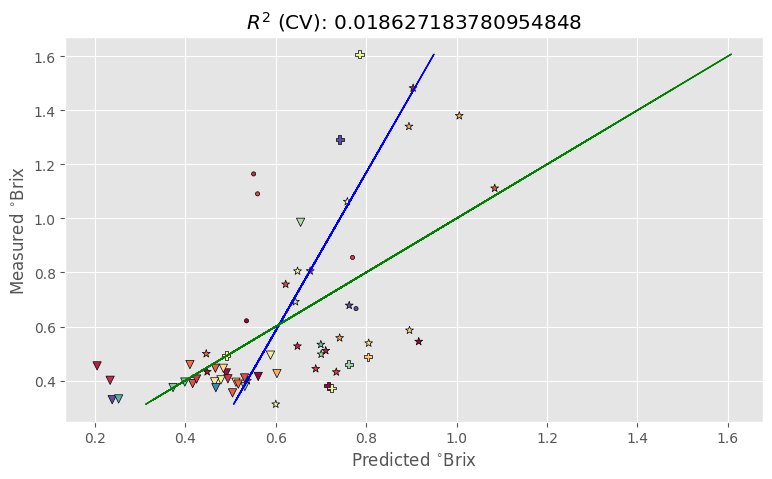

In [10]:
# optimise_pls_cv(x_ldmc,y_weighted_LDMC, 40, plot_components=True)
optimise_pls_cv(x_ldmc,y_weighted_LDMC, 40, vol_mois_LDMC,LDMC_n_2a, LDMC_n_1b,  LDMC_n_2c, LDMC_n_6, plot_components=True)

In [11]:
log_y_weighted_sla = np.log(y_weighted_sla)
log_y_weighted_la = np.log(y_weighted_la)
log_y_weighted_LDMC = np.log(y_weighted_LDMC)

100% completed
Suggested number of components:  4



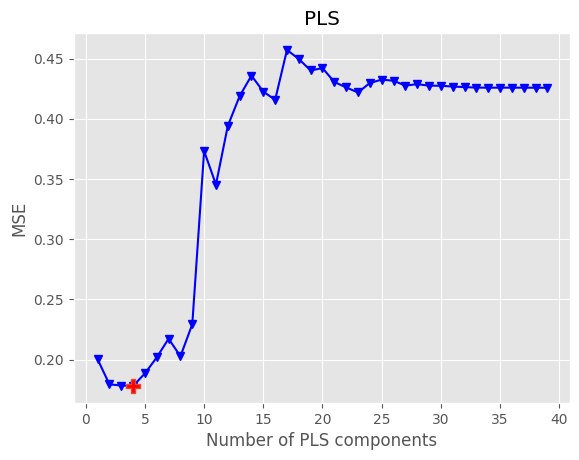

(61, 1) <class 'numpy.ndarray'> [[-0.42131042]
 [-0.41754628]
 [-0.62328409]
 [-0.47730266]
 [-0.17661997]
 [-0.4967774 ]
 [-0.57187267]
 [-0.4590899 ]
 [-0.76426924]
 [-0.15738823]
 [-0.20519831]
 [-0.0747903 ]
 [-0.42590524]
 [-0.33269348]
 [-0.70107883]
 [ 0.05284408]
 [-0.58090531]
 [-0.463592  ]
 [-0.58971951]
 [-0.26454182]
 [-0.30504044]
 [-0.38004484]
 [-0.40747872]
 [-0.72843126]
 [-0.78882708]
 [-0.9161983 ]
 [-1.12598546]]
-0.6006810883708011 -1.1629376677220686 0.4746204322656329 (61,)
-0.5776688189675954 -1.2173159016765465 0.13801035499767533 (61,)
0.3634534730117955 0.00398806503820488
R2 calib: 0.369
R2 CV: 0.018
MSE calib: 0.115
MSE CV: 0.178


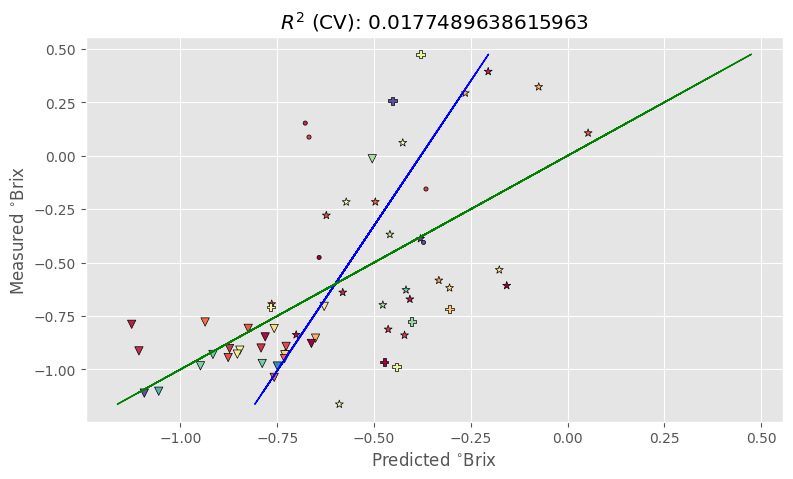

In [12]:
# optimise_pls_cv(x_ldmc,log_y_weighted_LDMC, 40, plot_components=True)
optimise_pls_cv(x_ldmc,log_y_weighted_LDMC, 40, vol_mois_LDMC,LDMC_n_2a, LDMC_n_1b,  LDMC_n_2c, LDMC_n_6, plot_components=True)

100% completed
Suggested number of components:  4



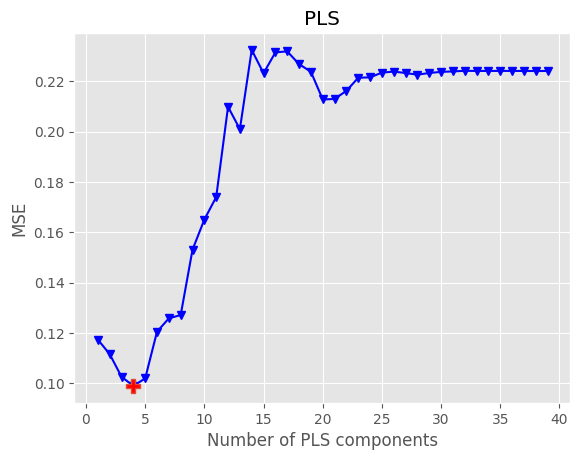

(63, 1) <class 'numpy.ndarray'> [[4.33894374]
 [4.30968981]
 [4.58697134]
 [4.44680911]
 [4.2002057 ]
 [4.15926094]
 [4.42373958]
 [4.50981151]
 [4.24973311]
 [4.3448107 ]
 [4.57548373]
 [4.16797518]
 [4.2353095 ]
 [4.11745219]
 [4.3499567 ]
 [4.27476002]
 [4.52141586]
 [4.00082873]
 [4.54120112]
 [4.37159276]
 [4.47623965]
 [4.31110655]
 [4.2806903 ]
 [4.32102021]
 [4.30590111]
 [4.65688775]
 [4.71781206]]
4.510127139837409 3.422942036707019 5.006246583780022 (63,)
4.5032073661506145 3.91541878717379 4.940488459537149 (63,)
0.4386556637806005 0.0003230299729490477
R2 calib: 0.377
R2 CV: 0.139
MSE calib: 0.072
MSE CV: 0.099


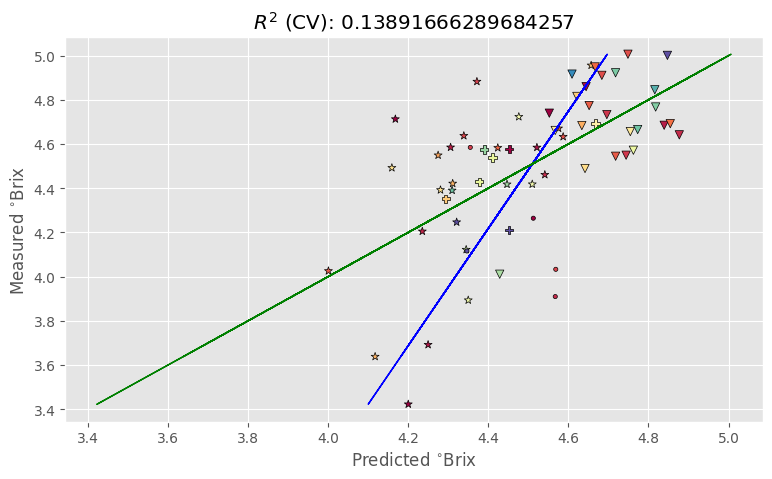

In [13]:
# optimise_pls_cv(x_sla,log_y_weighted_sla, 40, plot_components=True)
optimise_pls_cv(x_sla,log_y_weighted_sla, 40, vol_mois_sla,SLA_n_2a, SLA_n_1b,  SLA_n_2c, SLA_n_6, plot_components=True)

100% completed
Suggested number of components:  9



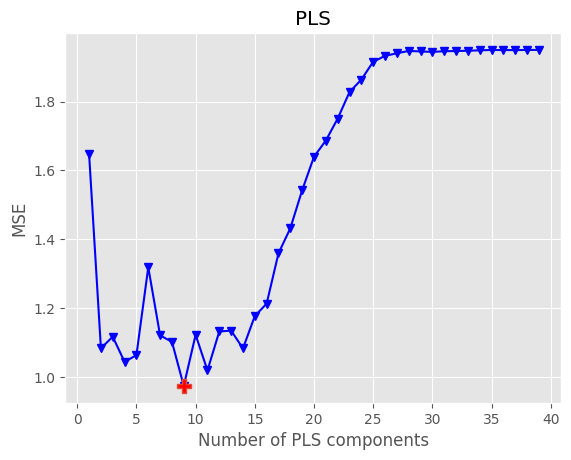

(64, 1) <class 'numpy.ndarray'> [[1.64566433]
 [0.04677975]
 [1.46807132]
 [0.83938276]
 [1.08339095]
 [2.72913969]
 [1.6390801 ]
 [1.41102869]
 [0.6812133 ]
 [1.74504191]
 [0.80880981]
 [1.60822771]
 [0.71341475]
 [1.16223368]
 [1.40795918]
 [0.60547529]
 [1.56176526]
 [1.06152515]
 [0.11428513]
 [0.54934163]
 [1.73743484]
 [0.18566407]
 [1.33846888]
 [1.02158697]
 [0.3044819 ]
 [1.95093615]
 [2.25680843]]
1.982469884629636 -0.9617662586536878 4.173871752423952 (64,)
2.021952004568695 -0.10588301419310042 4.028683533177904 (64,)
0.583226157658554 4.2519334288046466e-07
R2 calib: 0.793
R2 CV: 0.277
MSE calib: 0.279
MSE CV: 0.975


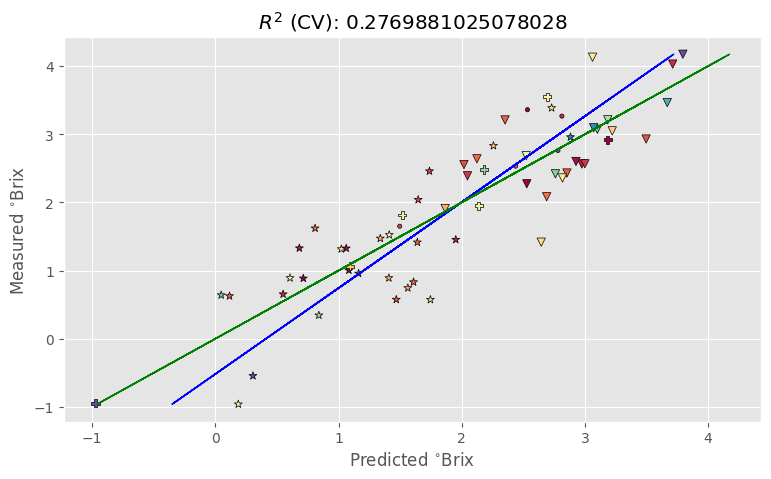

In [14]:
# optimise_pls_cv(x_la,log_y_weighted_la, 40, plot_components=True)
optimise_pls_cv(x_la,log_y_weighted_la, 40, vol_mois_la,LA_n_2a, LA_n_1b,  LA_n_2c, LA_n_6, plot_components=True)